In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('stock_prices(final).xlsx')
df.head()

,Date,Open,High,Low,Close,Volume
0,2022-01-03,754.0,781.0,754.00,776.54,66997
1,2022-01-04,778.0,798.0,776.54,796.41,133932
2,2022-01-05,798.0,798.0,785.00,788.97,12118
3,2022-01-06,780.0,797.0,772.90,786.71,41296
4,2022-01-07,787.0,815.0,785.00,806.55,143992


In [3]:
dates=df['Date']
print(dates)
dates.isna().sum()

0      2022-01-03
1      2022-01-04
2      2022-01-05
3      2022-01-06
4      2022-01-07
          ...    
413    2023-09-05
414    2023-09-06
415    2023-09-07
416    2023-09-08
417    2023-09-11
Name: Date, Length: 418, dtype: object


0

In [4]:
openprices=df['Open']
print(openprices)
openprices.isna().sum()

0      754.00
1      778.00
2      798.00
3      780.00
4      787.00
        ...  
413    431.99
414    431.00
415    431.00
416    428.00
417    436.50
Name: Open, Length: 418, dtype: float64


0

In [23]:
volume=df['Volume']
print(volume)
volume.isna().sum()


248    184508.0
249    208569.0
250    114409.0
251    225989.0
252    630424.0
         ...   
345    428235.0
346    651807.0
347    751047.0
348    800932.0
349    876979.0
Name: Volume, Length: 102, dtype: float64


0

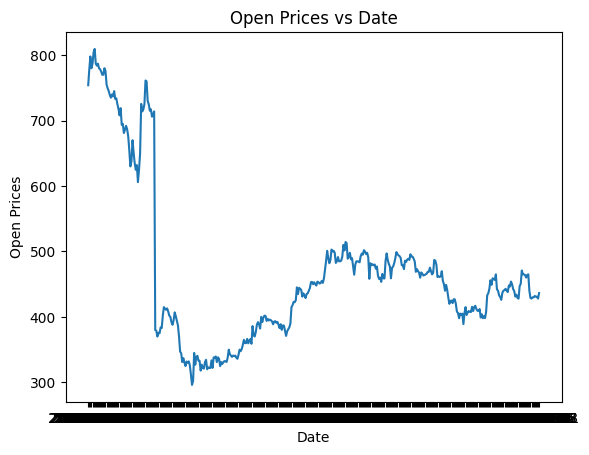

In [5]:
plt.plot(dates,openprices)
plt.xlabel('Date')
plt.ylabel('Open Prices')
plt.title('Open Prices vs Date')
plt.show()

In [6]:
# convert dates to datetime datatype
df['Date'] = pd.to_datetime(df['Date'])
# extract the month from the dates column
df['month'] = df['Date'].dt.month_name()
df.head()

,Date,Open,High,Low,Close,Volume,month
0,2022-01-03,754.0,781.0,754.00,776.54,66997,January
1,2022-01-04,778.0,798.0,776.54,796.41,133932,January
2,2022-01-05,798.0,798.0,785.00,788.97,12118,January
3,2022-01-06,780.0,797.0,772.90,786.71,41296,January
4,2022-01-07,787.0,815.0,785.00,806.55,143992,January


In [7]:
# extract month and year information
df['month_year'] = df['Date'].dt.strftime('%b-%Y')
df.head()

,Date,Open,High,Low,Close,Volume,month,month_year
0,2022-01-03,754.0,781.0,754.00,776.54,66997,January,Jan-2022
1,2022-01-04,778.0,798.0,776.54,796.41,133932,January,Jan-2022
2,2022-01-05,798.0,798.0,785.00,788.97,12118,January,Jan-2022
3,2022-01-06,780.0,797.0,772.90,786.71,41296,January,Jan-2022
4,2022-01-07,787.0,815.0,785.00,806.55,143992,January,Jan-2022


In [8]:
monthly_df= df.groupby('month_year')['Close'].mean().reset_index()
print(monthly_df)
month_order = ['Jan-2023', 'Feb-2023', 'Mar-2023', 'Apr-2023', 'May-2023']


# convert the 'month_year' column to a categorical data type with the ordered month names
df['month_year'] = pd.Categorical(df['month_year'], categories=month_order, ordered=True)
df.head()

   month_year       Close
0    Apr-2022  395.166000
1    Apr-2023  468.955625
2    Aug-2022  372.840476
3    Aug-2023  447.741818
4    Dec-2022  490.700909
5    Feb-2022  697.026000
6    Feb-2023  479.208000
7    Jan-2022  773.950952
8    Jan-2023  480.345000
9    Jul-2022  337.975556
10   Jul-2023  443.600500
11   Jun-2022  328.070000
12   Jun-2023  406.692105
13   Mar-2022  675.371818
14   Mar-2023  476.282727
15   May-2022  332.028889
16   May-2023  418.457727
17   Nov-2022  466.395714
18   Oct-2022  425.621429
19   Sep-2022  389.240909
20   Sep-2023  430.972857


,Date,Open,High,Low,Close,Volume,month,month_year
0,2022-01-03,754.0,781.0,754.00,776.54,66997,January,NaN
1,2022-01-04,778.0,798.0,776.54,796.41,133932,January,NaN
2,2022-01-05,798.0,798.0,785.00,788.97,12118,January,NaN
3,2022-01-06,780.0,797.0,772.90,786.71,41296,January,NaN
4,2022-01-07,787.0,815.0,785.00,806.55,143992,January,NaN


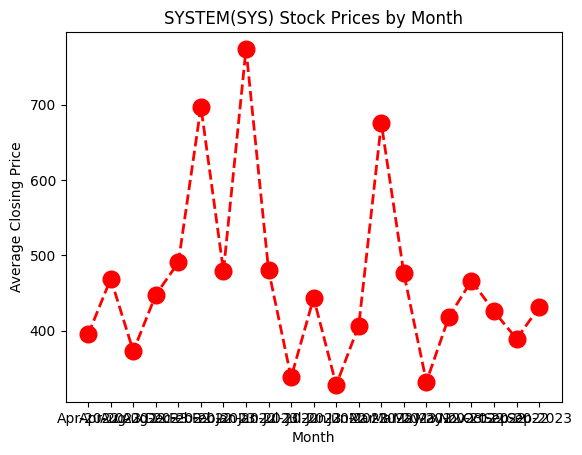

In [9]:
plt.plot(monthly_df['month_year'], monthly_df['Close'], marker='o', color='red', linestyle='dashed', linewidth=2, markersize=12)
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.title('SYSTEM(SYS) Stock Prices by Month')
plt.show()

In [13]:

df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

  month_year       Close
0   Jan-2023  480.345000
1   Feb-2023  479.208000
2   Mar-2023  476.282727
3   Apr-2023  468.955625
4   May-2023  418.457727


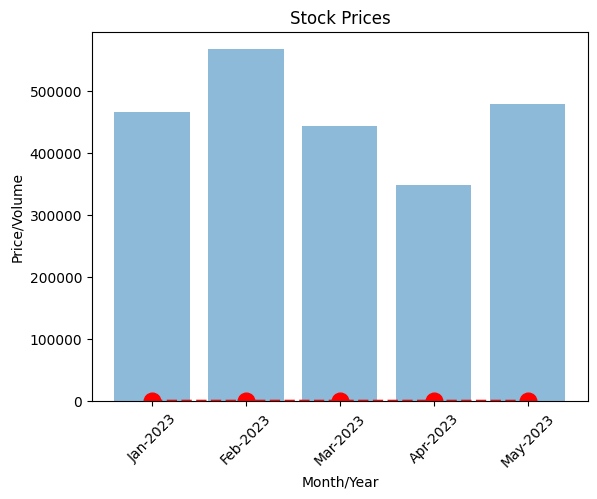

In [14]:
monthly_df= df.groupby('month_year')['Close'].mean().reset_index()
print(monthly_df)

plt.plot(monthly_df['month_year'], monthly_df['Close'], marker='o', color='red', linestyle='dashed', linewidth=2, markersize=12)
monthly_df = df.groupby('month_year')['Volume'].mean().reset_index()
# create bar plot
plt.bar(monthly_df['month_year'], monthly_df['Volume'], alpha=0.5)

# set x-axis labels
plt.xticks(rotation=45)

# set plot title and labels
plt.title('Stock Prices')
plt.xlabel('Month/Year')
plt.ylabel('Price/Volume')

# show plot
plt.show()

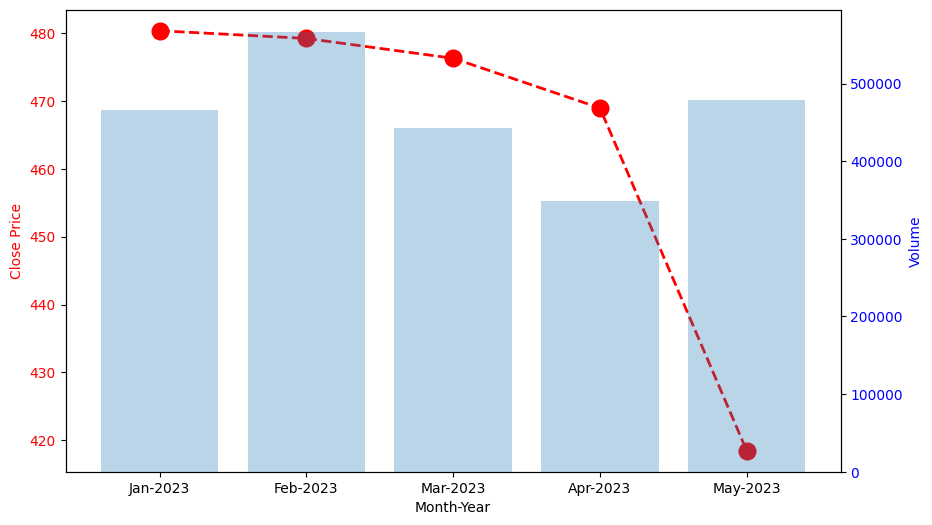

In [15]:


fig, ax1 = plt.subplots(figsize=(10, 6))
monthly_df= df.groupby('month_year')['Close'].mean().reset_index()
# line plot
ax1.plot(monthly_df['month_year'], monthly_df['Close'], marker='o', color='red', linestyle='dashed', linewidth=2, markersize=12)
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Close Price', color='red')
ax1.tick_params(axis='y', labelcolor='red')
monthly_df= df.groupby('month_year')['Volume'].mean().reset_index()
# bar plot
ax2 = ax1.twinx()
ax2.bar(monthly_df['month_year'], monthly_df['Volume'], alpha=0.3)
ax2.set_ylabel('Volume', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.show()


In [16]:
df.head()

,Date,Open,High,Low,Close,Volume,month,month_year
0,2022-01-03,754.0,781.0,754.00,776.54,NaN,January,NaN
1,2022-01-04,778.0,798.0,776.54,796.41,NaN,January,NaN
2,2022-01-05,798.0,798.0,785.00,788.97,NaN,January,NaN
3,2022-01-06,780.0,797.0,772.90,786.71,NaN,January,NaN
4,2022-01-07,787.0,815.0,785.00,806.55,NaN,January,NaN


In [17]:
df.dropna(inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,month,month_year
248,2023-01-02,485.00,485.00,476.11,479.41,184508.0,January,Jan-2023
249,2023-01-03,484.95,485.00,478.75,482.76,208569.0,January,Jan-2023
250,2023-01-04,484.50,487.50,481.00,482.63,114409.0,January,Jan-2023
251,2023-01-05,483.50,490.50,482.50,488.79,225989.0,January,Jan-2023
252,2023-01-06,492.85,500.16,488.01,496.83,630424.0,January,Jan-2023


In [19]:
df.isna().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
month         0
month_year    0
dtype: int64

In [21]:
print(df['Volume'])

248    184508.0
249    208569.0
250    114409.0
251    225989.0
252    630424.0
         ...   
345    428235.0
346    651807.0
347    751047.0
348    800932.0
349    876979.0
Name: Volume, Length: 102, dtype: float64
